
Objetivos

* Realizar una selección de características a través del Análisis de Componentes Principales (ACP) y el Análisis Correlacional de Datos (ACD).

Diccionario de datos

IMPORTACIÓN DE BIBLIOTECAS Y DE LA FUENTE DE DATOS 

In [1]:
import pandas as pd                    # Para la manipulación y análisis de datos
import numpy as np                     # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt        # Para la generación de gráficas a partir de los datos
import seaborn as sns                  # Para la visualización de datos basado en matplotlib
import scipy as sp                     # Para el análisis de datos
%matplotlib inline
import plotly.express as px            # Para la visualización de datos interactivos

In [2]:

# ! Cargamos el conjunto de datos
# * En Google Colab:
# from google.colab import files
# files.upload()

# * En Jupyter Notebook (de manera local):
# DatosMelbourne = pd.read_csv("melb_data.csv")

# * En Google Colab, se importa el archivo desde Drive:
# from google.colab import drive
# drive.mount('/content/drive')


# * 
dataMiami = pd.read_csv("https://raw.githubusercontent.com/OswaCabrera/DataMining/main/Data/miami-housing.csv")
dataMiami

LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
0      25.891031 -80.160561  622280070620  440000.0        9375          1753   
1      25.891324 -80.153968  622280100460  349000.0        9375          1715   
2      25.891334 -80.153740  622280100470  800000.0        9375          2276   
3      25.891765 -80.152657  622280100530  988000.0       12450          2058   
4      25.891825 -80.154639  622280100200  755000.0       12800          1684   
...          ...        ...           ...       ...         ...           ...   
13927  25.783130 -80.259795  131320040990  275000.0        6780           967   
13928  25.783585 -80.260354  131320040910  340000.0        7500          1854   
13929  25.783793 -80.256126  131320040420  287500.0        8460          1271   
13930  25.784007 -80.257542  131320040330  315000.0        7500          1613   
13931  25.784387 -80.258901  131320040700  250000.0        8833          1867   

       SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  \
0                  0     2815.9     12811.4       347.6    42815.3   
1                  0     4359.1     10648.4       337.8    43504.9   
2              49206     4412.9     10574.1       297.1    43530.4   
3              10033     4585.0     10156.5         0.0    43797.5   
4              16681     4063.4     10836.8       326.6    43599.7   
...              ...        ...         ...         ...        ...   
13927           6580     3844.5     20568.0      3252.4    22175.9   
13928           2544     3593.6     20791.9      3077.7    22375.1   
13929           2064     4143.2     20307.9      3588.4    20966.9   
13930           3136     3986.9     20542.6      3589.1    21475.6   
13931            266     3793.9     20859.6      3421.0    21928.6   

       SUBCNTR_DI  HWY_DIST  age  avno60plus  month_sold  structure_quality  
0         37742.2   15954.9   67           0           8                  4  
1         37340.5   18125.0   63           0           9                  4  
2         37328.7   18200.5   61           0           2                  4  
3         37423.2   18514.4   63           0           9                  4  
4         37550.8   17903.4   42           0           7                  4  
...           ...       ...  ...         ...         ...                ...  
13927     12150.1     917.4   16           0           4                  4  
13928     12316.8     738.2   26           0           5                  4  
13929     12433.0     743.7   16           0           7                  4  
13930     12458.0     626.1   16           0           8                  4  
13931     12599.0     474.7   62           0          11                  4  

[13932 rows x 17 columns]

ANÁLISIS DE COMPONENTES PRINCIPALES (ACP - PCA) 

1. Hay evidencia de variables posiblemente correlacionadas.
2. Se hace una estandarización de los datos.
3. Con los datos estandarizados, se calcula la matriz de covarianzas o correlaciones.
4. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior.
5. Se decide el número de componentes principales. 
- Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total. 
- Se identifica mediante una gráfica el grupo de componentes con mayor varianza.
6. Se examina la proporción de relevancias –cargas–

<a id="41"></a>

## PASO 1. Hay evidencia de variables posiblemente correlacionadas.

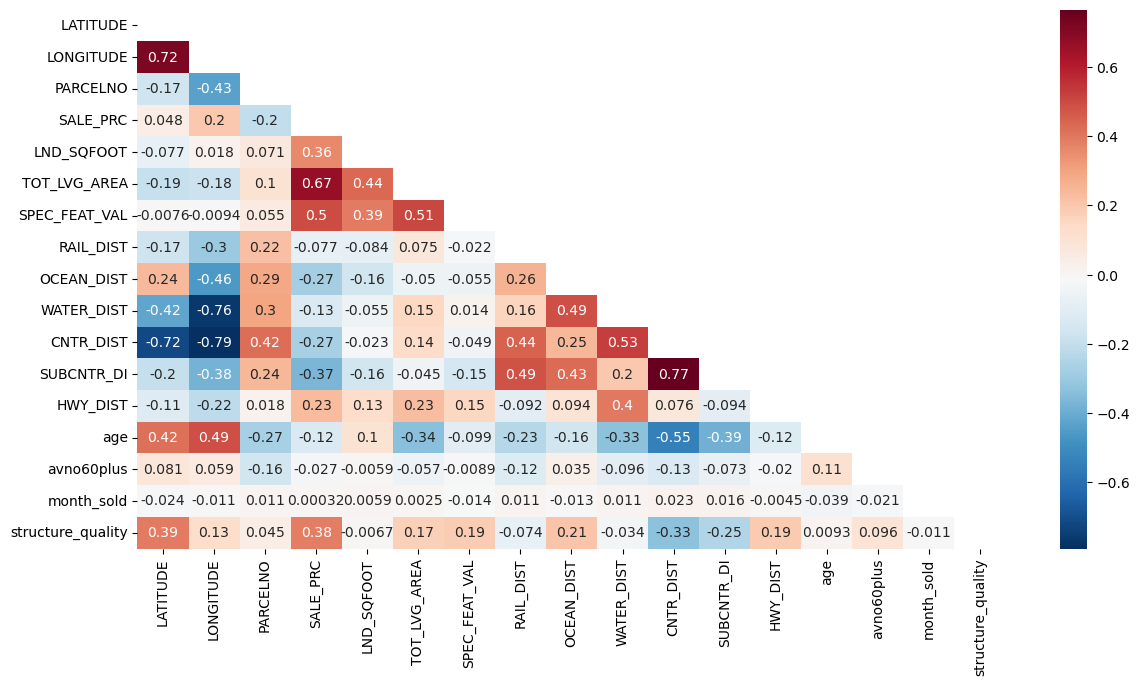

In [4]:
CorrMiami = dataMiami.corr(method='pearson')
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrMiami)
sns.heatmap(CorrMiami, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [5]:
mask = np.triu(np.ones_like(CorrMiami, dtype=bool))
CorrMiami = CorrMiami.mask(mask)

fig = px.imshow(CorrMiami, color_continuous_scale='RdBu_r', labels=dict(color="Correlación"), title='Correlación entre variables', aspect="auto")

for i in range(len(CorrMiami.columns)):
    for j in range(i):
        if abs(CorrMiami.iloc[i,j]) > 0.67:
            fig.add_annotation(x=j, y=i, text=str(round(CorrMiami.iloc[i,j], 4)), showarrow=False, font_color='white')
        else:
            fig.add_annotation(x=j, y=i, text=str(round(CorrMiami.iloc[i,j], 4)), showarrow=False, font_color='black')
fig.show()

In [7]:
dataMiami.dtypes

LATITUDE             float64
LONGITUDE            float64
PARCELNO               int64
SALE_PRC             float64
LND_SQFOOT             int64
TOT_LVG_AREA           int64
SPEC_FEAT_VAL          int64
RAIL_DIST            float64
OCEAN_DIST           float64
WATER_DIST           float64
CNTR_DIST            float64
SUBCNTR_DI           float64
HWY_DIST             float64
age                    int64
avno60plus             int64
month_sold             int64
structure_quality      int64
dtype: object

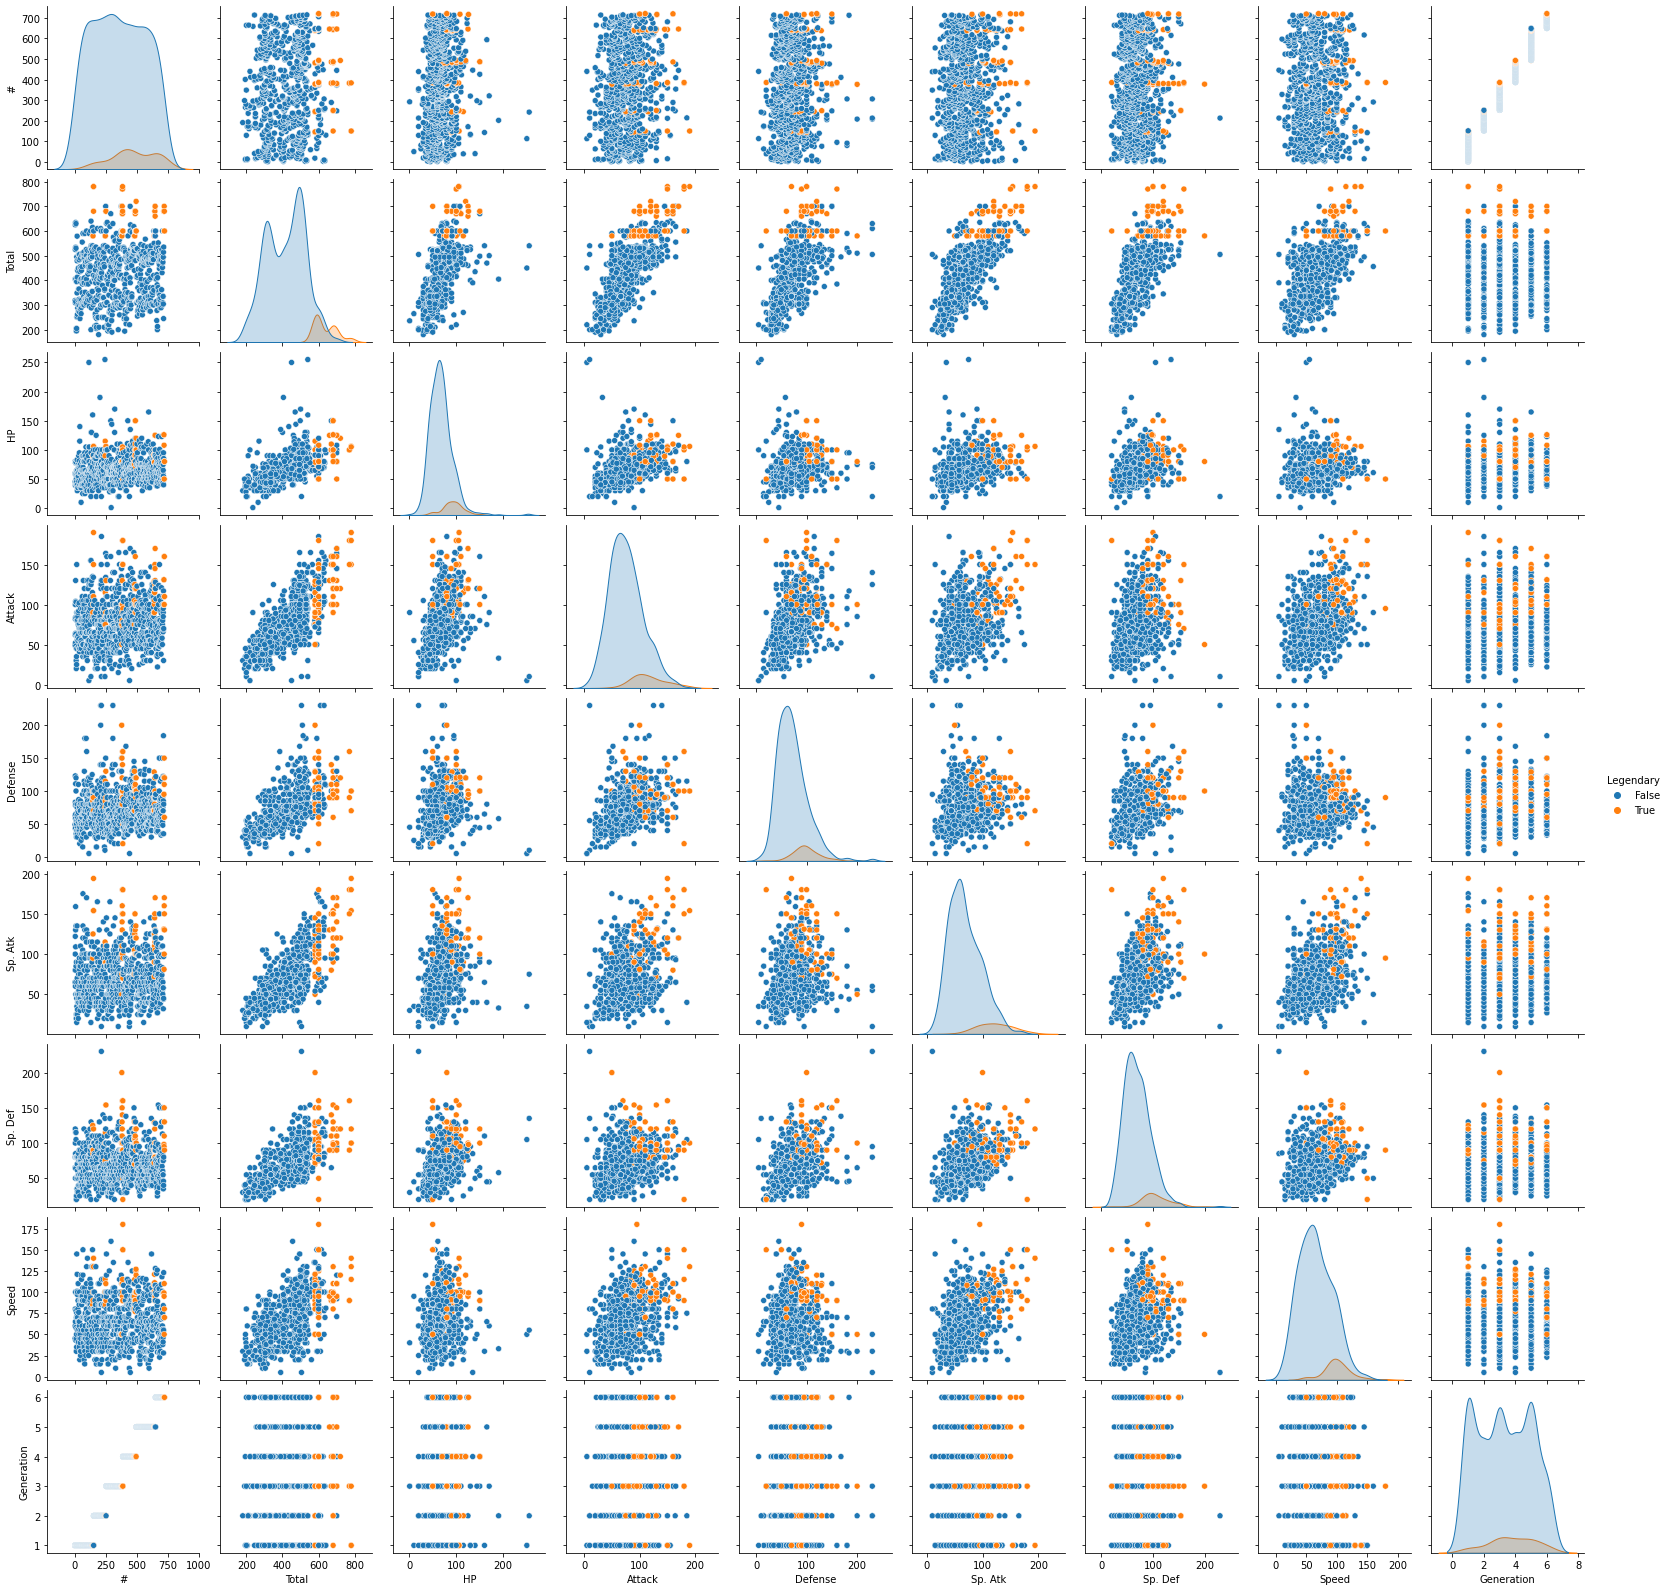

In [8]:
sns.pairplot(df, hue='Legendary')
plt.show()

In [9]:
edadf = pd.DataFrame({
                        'Valores faltantes': df.isnull().sum(), '% Faltantes': 100*df.isnull().sum()/len(df),
                        'Tipo de dato': df.dtypes,'Valores únicos': df.nunique(),
                        'Valores más frecuentes': df.apply(lambda x: x.value_counts().index[0]),
                        'Cantidad de valores más frecuentes': df.apply(lambda x: x.value_counts().iloc[0]),
                        'Valores menos frecuentes': df.apply(lambda x: x.value_counts().index[-1]),
                        'Cantidad de valores menos frecuentes': df.apply(lambda x: x.value_counts().iloc[-1])
                        })
edadf

Valores faltantes  % Faltantes Tipo de dato  Valores únicos  \
#                           0         0.00        int64             721   
Name                        0         0.00       object             800   
Type 1                      0         0.00       object              18   
Type 2                    386        48.25       object              18   
Total                       0         0.00        int64             200   
HP                          0         0.00        int64              94   
Attack                      0         0.00        int64             111   
Defense                     0         0.00        int64             103   
Sp. Atk                     0         0.00        int64             105   
Sp. Def                     0         0.00        int64              92   
Speed                       0         0.00        int64             108   
Generation                  0         0.00        int64               6   
Legendary                   0         0.00         bool               2   

           Valores más frecuentes  Cantidad de valores más frecuentes  \
#                             479                                   6   
Name                    Bulbasaur                                   1   
Type 1                      Water                                 112   
Type 2                     Flying                                  97   
Total                         600                                  37   
HP                             60                                  67   
Attack                        100                                  40   
Defense                        70                                  54   
Sp. Atk                        60                                  51   
Sp. Def                        80                                  52   
Speed                          50                                  46   
Generation                      1                                 166   
Legendary                   False                                 735   

           Valores menos frecuentes  Cantidad de valores menos frecuentes  
#                               721                                     1  
Name                      Volcanion                                     1  
Type 1                       Flying                                     4  
Type 2                          Bug                                     3  
Total                           514                                     1  
HP                               97                                     1  
Attack                           33                                     1  
Defense                         121                                     1  
Sp. Atk                         175                                     1  
Sp. Def                         113                                     1  
Speed                           123                                     1  
Generation                        6                                    82  
Legendary                      True                                    65

In [10]:
# Mostremos el top 10 de los pokemons más fuertes
df.sort_values(by=['Total'], ascending=False).head(10)

#                     Name   Type 1    Type 2  Total   HP  Attack  \
426  384    RayquazaMega Rayquaza   Dragon    Flying    780  105     180   
164  150      MewtwoMega Mewtwo Y  Psychic       NaN    780  106     150   
163  150      MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190   
422  382      KyogrePrimal Kyogre    Water       NaN    770  100     150   
424  383    GroudonPrimal Groudon   Ground      Fire    770  100     180   
552  493                   Arceus   Normal       NaN    720  120     120   
712  646       KyuremWhite Kyurem   Dragon       Ice    700  125     120   
711  646       KyuremBlack Kyurem   Dragon       Ice    700  125     170   
409  373  SalamenceMega Salamence   Dragon    Flying    700   95     145   
413  376  MetagrossMega Metagross    Steel   Psychic    700   80     145   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
426      100      180      100    115           3       True  
164       70      194      120    140           1       True  
163      100      154      100    130           1       True  
422       90      180      160     90           3       True  
424      160      150       90     90           3       True  
552      120      120      120    120           4       True  
712       90      170      100     95           5       True  
711      100      120       90     95           5       True  
409      130      120       90    120           3      False  
413      150      105      110    110           3      False

In [11]:
# * Cambiamos la columna Legendary a numérica (True = 1, False = 0)
df['Legendary'] = df['Legendary'].astype(int)
df

#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1          0  
1         80       80     60           1          0  
2        100      100     80           1          0  
3        122      120     80           1          0  
4         60       50     65           1          0  
..       ...      ...    ...         ...        ...  
795      100      150     50           6          1  
796      160      110    110           6          1  
797      150      130     70           6          1  
798      170      130     80           6          1  
799      130       90     70           6          1  

[800 rows x 13 columns]

In [12]:
# Vemos cuántos tipos de Pokemon existen:
print(df['Type 1'].unique())
print(df['Type 1'].unique().size)

print(df['Type 2'].unique())
print(df['Type 2'].unique().size)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
18
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
19


In [11]:
# Cambiando los NaN por: 0
DatosPokemon['Type 2'] = DatosPokemon['Type 2'].fillna(0)
DatosPokemon

#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire       0    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1          0  
1         80       80     60           1          0  
2        100      100     80           1          0  
3        122      120     80           1          0  
4         60       50     65           1          0  
..       ...      ...    ...         ...        ...  
795      100      150     50           6          1  
796      160      110    110           6          1  
797      150      130     70           6          1  
798      170      130     80           6          1  
799      130       90     70           6          1  

[800 rows x 13 columns]

In [12]:
# Cambiamos los tipos de datos de las columnas Type 1 y Type 2 a numéricas: 
# (1 = Grass, 2 = Fire, 3 = Water, 4 = Bug, 5 = Normal, 6 = Poison, 7 = Electric, 8 = Ground, 9 = Fairy, 10 = Fighting, 11 = Psychic, 12 = Rock, 13 = Ghost, 14 = Ice, 15 = Dragon, 16 = Dark, 17 = Steel, 18 = Flying, 0 = NaN)
DatosPokemon['Type 1'] = DatosPokemon['Type 1'].replace(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
DatosPokemon['Type 2'] = DatosPokemon['Type 2'].replace(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying', 0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 0])

DatosPokemon

#                   Name  Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur       1       6    318  45      49       49   
1      2                Ivysaur       1       6    405  60      62       63   
2      3               Venusaur       1       6    525  80      82       83   
3      3  VenusaurMega Venusaur       1       6    625  80     100      123   
4      4             Charmander       2       0    309  39      52       43   
..   ...                    ...     ...     ...    ...  ..     ...      ...   
795  719                Diancie      12       9    600  50     100      150   
796  719    DiancieMega Diancie      12       9    700  50     160      110   
797  720    HoopaHoopa Confined      11      13    600  80     110       60   
798  720     HoopaHoopa Unbound      11      16    680  80     160       60   
799  721              Volcanion       2       3    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1          0  
1         80       80     60           1          0  
2        100      100     80           1          0  
3        122      120     80           1          0  
4         60       50     65           1          0  
..       ...      ...    ...         ...        ...  
795      100      150     50           6          1  
796      160      110    110           6          1  
797      150      130     70           6          1  
798      170      130     80           6          1  
799      130       90     70           6          1  

[800 rows x 13 columns]

In [13]:
# ! Eliminamos las columnas que son de tipo object y las guardamos en un nuevo DataFrame
DatosPokemonNumericos = DatosPokemon.select_dtypes(exclude=['object'])
DatosPokemonNumericos

#  Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0      1       1       6    318  45      49       49       65       65     45   
1      2       1       6    405  60      62       63       80       80     60   
2      3       1       6    525  80      82       83      100      100     80   
3      3       1       6    625  80     100      123      122      120     80   
4      4       2       0    309  39      52       43       60       50     65   
..   ...     ...     ...    ...  ..     ...      ...      ...      ...    ...   
795  719      12       9    600  50     100      150      100      150     50   
796  719      12       9    700  50     160      110      160      110    110   
797  720      11      13    600  80     110       60      150      130     70   
798  720      11      16    680  80     160       60      170      130     80   
799  721       2       3    600  80     110      120      130       90     70   

     Generation  Legendary  
0             1          0  
1             1          0  
2             1          0  
3             1          0  
4             1          0  
..          ...        ...  
795           6          1  
796           6          1  
797           6          1  
798           6          1  
799           6          1  

[800 rows x 12 columns]

<a id="42"></a>

## PASO 2. Se hace una estandarización de los datos. 📌

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
Estandarizar1 = StandardScaler() # Se instancia el objeto StandardScaler o MinMaxScaler 
MEstandarizada1 = Estandarizar1.fit_transform(DatosPokemonNumericos) # Se calculan la media y desviación para cada variable, y se escalan los datos

In [15]:
pd.DataFrame(MEstandarizada1, columns=DatosPokemonNumericos.columns)
#Los valores más grandes son los que pesarían más, por eso es necesario estandarizar los datos. 

#    Type 1    Type 2     Total        HP    Attack   Defense  \
0   -1.737705 -1.293880  0.011694 -0.976765 -0.950626 -0.924906 -0.797154   
1   -1.732902 -1.293880  0.011694 -0.251088 -0.362822 -0.524130 -0.347917   
2   -1.728100 -1.293880  0.011694  0.749845  0.420917  0.092448  0.293849   
3   -1.728100 -1.293880  0.011694  1.583957  0.420917  0.647369  1.577381   
4   -1.723297 -1.088706 -0.851886 -1.051836 -1.185748 -0.832419 -0.989683   
..        ...       ...       ...       ...       ...       ...       ...   
795  1.710678  0.963037  0.443485  1.375429 -0.754692  0.647369  2.443765   
796  1.710678  0.963037  0.443485  2.209541 -0.754692  2.497104  1.160233   
797  1.715480  0.757862  1.019205  1.375429  0.420917  0.955658 -0.444182   
798  1.715480  0.757862  1.450996  2.042718  0.420917  2.497104 -0.444182   
799  1.720283 -1.088706 -0.420096  1.375429  0.420917  0.955658  1.481116   

      Sp. Atk   Sp. Def     Speed  Generation  Legendary  
0   -0.239130 -0.248189 -0.801503   -1.399637  -0.297381  
1    0.219560  0.291156 -0.285015   -1.399637  -0.297381  
2    0.831146  1.010283  0.403635   -1.399637  -0.297381  
3    1.503891  1.729409  0.403635   -1.399637  -0.297381  
4   -0.392027 -0.787533 -0.112853   -1.399637  -0.297381  
..        ...       ...       ...         ...        ...  
795  0.831146  2.808099 -0.629341    1.611954   3.362691  
796  2.665905  1.369846  1.436611    1.611954   3.362691  
797  2.360112  2.088973  0.059310    1.611954   3.362691  
798  2.971699  2.088973  0.403635    1.611954   3.362691  
799  1.748526  0.650720  0.059310    1.611954   3.362691  

[800 rows x 12 columns]

<a id="43"></a>

## PASO 3. Con los datos estandarizados, se calcula la matriz de covarianzas o correlaciones. 📌

In [16]:
pca = PCA() #Se instancia el objeto PCA    #pca=PCA(n_components=None), pca=PCA(.85), pca=PCA(n_components=10)
pca.fit(MEstandarizada1) #Se obtiene los componentes
# pca.components_ #Se obtienen los componentes principales

PCA()

<a id="44"></a>

## PASO 4. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior. 📌

In [17]:
Varianza = pca.explained_variance_ratio_
# print('Proporción de varianza:', Varianza)

In [18]:
# Nos apoyamos de un sencillo programa para saber cuántas componentes son necesarias
for i in range(0, Varianza.size):
    print('Componente', i+1, '->', Varianza[i]*100, '%')
    varAcumulada = sum(Varianza[0:i+1])
    print('Varianza acumulada:', varAcumulada*100, '%')
    if varAcumulada >= 0.90:
        varAcumuladaACP = (varAcumulada - Varianza[i])
        numComponentesACP = i - 1
        print('Se requieren', i, 'componentes para alcanzar el 90% de porcentaje de relevancia')
        print('La varianza acumulada para', i, 'componentes es de:', varAcumuladaACP*100, '%')
        break

Componente 1 -> 34.70314100465682 %
Varianza acumulada: 34.70314100465682 %
Componente 2 -> 16.863599692940294 %
Varianza acumulada: 51.56674069759711 %
Componente 3 -> 9.555242552772071 %
Varianza acumulada: 61.12198325036918 %
Componente 4 -> 8.205311177949746 %
Varianza acumulada: 69.32729442831894 %
Componente 5 -> 7.773189443923835 %
Varianza acumulada: 77.10048387224276 %
Componente 6 -> 6.502932490723691 %
Varianza acumulada: 83.60341636296646 %
Componente 7 -> 5.449441975097148 %
Varianza acumulada: 89.0528583380636 %
Componente 8 -> 5.103725894923892 %
Varianza acumulada: 94.1565842329875 %
Se requieren 7 componentes para alcanzar el 90% de porcentaje de relevancia
La varianza acumulada para 7 componentes es de: 89.0528583380636 %


In [19]:
# Se grafica la varianza explicada por cada componente en un gráfico de barras en Plotly:
fig = px.bar(x=range(1, Varianza.size +1), y=Varianza*100, labels=dict(x="Componentes Principales", y="Varianza explicada (%)"), title='Varianza explicada por cada componente')
# A cada barra se le agrega el porcentaje de varianza explicada
for i in range(1, Varianza.size +1):
    fig.add_annotation(x=i, y=Varianza[i-1]*100, text=str(round(Varianza[i-1]*100, 2)) + '%',
    # Se muestran por encima de la barra:
    yshift=10, showarrow=False, font_color='black')
# Se agrega una gráfica de línea de la varianza explicada que pase por cada barra:
fig.add_scatter(x=np.arange(1, Varianza.size+1, step=1), y=Varianza*100, mode='lines+markers', name='Varianza explicada',showlegend=False)
# Mostramos todos los valores del eje X:
fig.update_xaxes(tickmode='linear')
fig.show()

<a id="45"></a>

## PASO 5. Se decide el número de componentes principales. 📌

<a id="451"></a>

### - Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total.

<a id="452"></a>

### - Se identifica mediante una gráfica el grupo de componentes con mayor varianza.

In [20]:
# # Se grafica la varianza acumulada en los componentes
# plt.plot(np.cumsum(Varianza))

# plt.xticks(np.arange(0, Varianza.size, step=1))
# plt.yticks(np.arange(0, 1.1, step=0.1))

# plt.xlabel('Número de componentes')
# plt.ylabel('Varianza acumulada')

# # Se resalta el número de componentes que se requieren para alcanzar el 90% de varianza acumulada
# plt.axhline(y=0.9, color='r', linestyle='--')
# plt.axvline(x=numComponentesACP, color='g', linestyle='--')

# # Se muestra un punto en la intersección de las líneas
# plt.plot(numComponentesACP, varAcumuladaACP, 'bo')

# # Se muestra el valor de la varianza acumulada
# plt.text(numComponentesACP+0.05, varAcumuladaACP+0.05, str(round(varAcumuladaACP*100, 1))+'%')

# plt.grid()
# plt.show()

In [21]:
fig = px.line(x=np.arange(1, Varianza.size+1, step=1), y=np.cumsum(Varianza))
fig.update_layout(title='Varianza acumulada en los componentes',
                    xaxis_title='Número de componentes',
                    yaxis_title='Varianza acumulada')
# Se resalta el número de componentes que se requieren para alcanzar el 90% de varianza acumulada
fig.add_shape(type="line", x0=1, y0=0.9, x1=numComponentesACP+1, y1=0.9, line=dict(color="Red", width=2, dash="dash"))
fig.add_shape(type="line", x0=numComponentesACP+1, y0=0, x1=numComponentesACP+1, y1=varAcumuladaACP, line=dict(color="Green", width=2, dash="dash"))
# Se muestra un punto en la intersección de las líneas
fig.add_annotation(x=numComponentesACP+1, y=varAcumuladaACP, text=str(round(varAcumuladaACP*100, 1))+f'%. {numComponentesACP+1} Componentes', showarrow=True, arrowhead=1)
# Se agregan puntos en la línea de la gráfica
fig.add_scatter(x=np.arange(1, Varianza.size+1, step=1), y=np.cumsum(Varianza), mode='markers', marker=dict(size=10, color='blue'), showlegend=False, name='# Componentes')
# Se le agrega el área bajo la curva
fig.add_scatter(x=np.arange(1, Varianza.size+1, step=1), y=np.cumsum(Varianza), fill='tozeroy', mode='none', showlegend=False, name='Área bajo la curva')
fig.update_xaxes(range=[1, Varianza.size]) # Se ajusta al tamaño de la gráfica
fig.update_xaxes(tickmode='linear')
fig.update_yaxes(range=[0, 1.1], 
                tickmode='array',
                tickvals=np.arange(0, 1.1, step=0.1))
fig.show()

<a id="46"></a>

## PASO 6: Se examina la proporción de relevancias –cargas– 📌

- La importancia de cada variable se refleja en la magnitud de los valores en los componentes (mayor magnitud es sinónimo de mayor importancia).
- Se revisan los valores absolutos de los componentes principales seleccionados. 
- Cuanto mayor sea el valor absoluto, más importante es esa variable en el componente principal.

In [22]:
CargasComponentes = pd.DataFrame(abs(pca.components_), columns=DatosPokemonNumericos.columns)
# Gráfico de calor de las cargas de los componentes en Plotly
fig = px.imshow(CargasComponentes.head(numComponentesACP+1), labels=dict(x="Variables", y="Componentes", color="Cargas"),color_continuous_scale='BlueRed')
fig.update_layout(title='Cargas de los componentes')
# Mostramos el valor de las cargas en cada celda (blanco si es mayor a 0.5, negro si es menor)
for i in range(numComponentesACP+1):
    for j in range(len(DatosPokemonNumericos.columns)):
        if CargasComponentes.iloc[i,j] > 0.5:
            fig.add_annotation(x=j, y=i, text=str(round(CargasComponentes.iloc[i,j], 6)), showarrow=False, font_color='white')
        else:
            fig.add_annotation(x=j, y=i, text=str(round(CargasComponentes.iloc[i,j], 6)), showarrow=False, font_color='black')
fig.show()

In [23]:
# Se obtienen los componentes principales (cargas mayores a 0.5)
componentesPrincipales = []
for i in range(0, CargasComponentes.shape[0]): #Recorre las columnas
    for j in range(0, CargasComponentes.shape[1]-numComponentesACP+1): # Recorre los componentes (filas)
        if CargasComponentes.iloc[j, i] >= 0.5:
            print(CargasComponentes.columns[i], ':', CargasComponentes.iloc[j, i])
            componentesPrincipales = np.append(componentesPrincipales, CargasComponentes.columns[i])

# : 0.668972350972809
Type 1 : 0.648556366649038
Type 2 : 0.8387941158244688
HP : 0.565802087148378
Attack : 0.6465468707317952
Defense : 0.6181724476646773
Sp. Def : 0.5576139835675141
Speed : 0.5478202708066966
Generation : 0.6728090522522608
Legendary : 0.5144013986712113


- Solo se seleccionan del componente 0 al 5. Y un mínimo de 50% para el análisis de carga.
- Las variables que quedarían, son: 
  - #: 0.668972
  - Type 1: 0.648556
  - Type 2: 0.838794
  - HP: 0.565802
  - Attack: 0.646547
  - Defense: 0.618172
  - Sp. Def: 0.557614
  - Speed: 0.547820
  - Generation: 0.672809
  - Legendary: 0.514401

In [24]:
#Solo incluimos los componentes principales:
DatosPokemonACP = DatosPokemonNumericos.loc[:, componentesPrincipales]
DatosPokemonACP

#  Type 1  Type 2  HP  Attack  Defense  Sp. Def  Speed  Generation  \
0      1       1       6  45      49       49       65     45           1   
1      2       1       6  60      62       63       80     60           1   
2      3       1       6  80      82       83      100     80           1   
3      3       1       6  80     100      123      120     80           1   
4      4       2       0  39      52       43       50     65           1   
..   ...     ...     ...  ..     ...      ...      ...    ...         ...   
795  719      12       9  50     100      150      150     50           6   
796  719      12       9  50     160      110      110    110           6   
797  720      11      13  80     110       60      130     70           6   
798  720      11      16  80     160       60      130     80           6   
799  721       2       3  80     110      120       90     70           6   

     Legendary  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
795          1  
796          1  
797          1  
798          1  
799          1  

[800 rows x 10 columns]

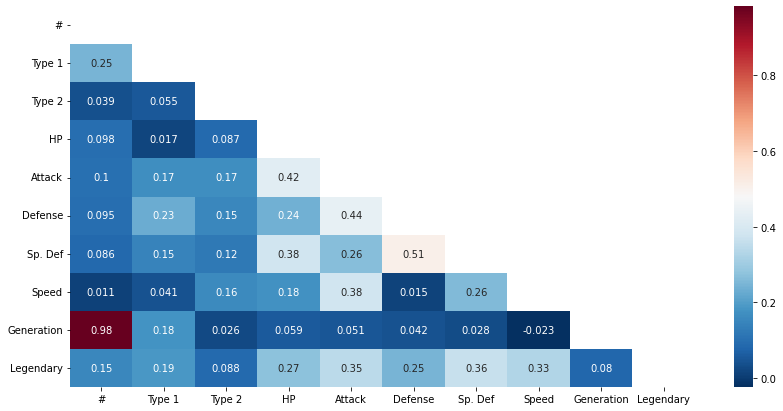

In [25]:
CorrPokemonACP = DatosPokemonACP.corr(method='pearson')
plt.figure(figsize=(14,7))
MatrizInfACP = np.triu(CorrPokemonACP)
sns.heatmap(CorrPokemonACP, cmap='RdBu_r', annot=True, mask=MatrizInfACP)
plt.show()

<a id="5"></a>

# ANÁLISIS DE CORRELACIONAL DE DATOS 📊

## Evaluación visual

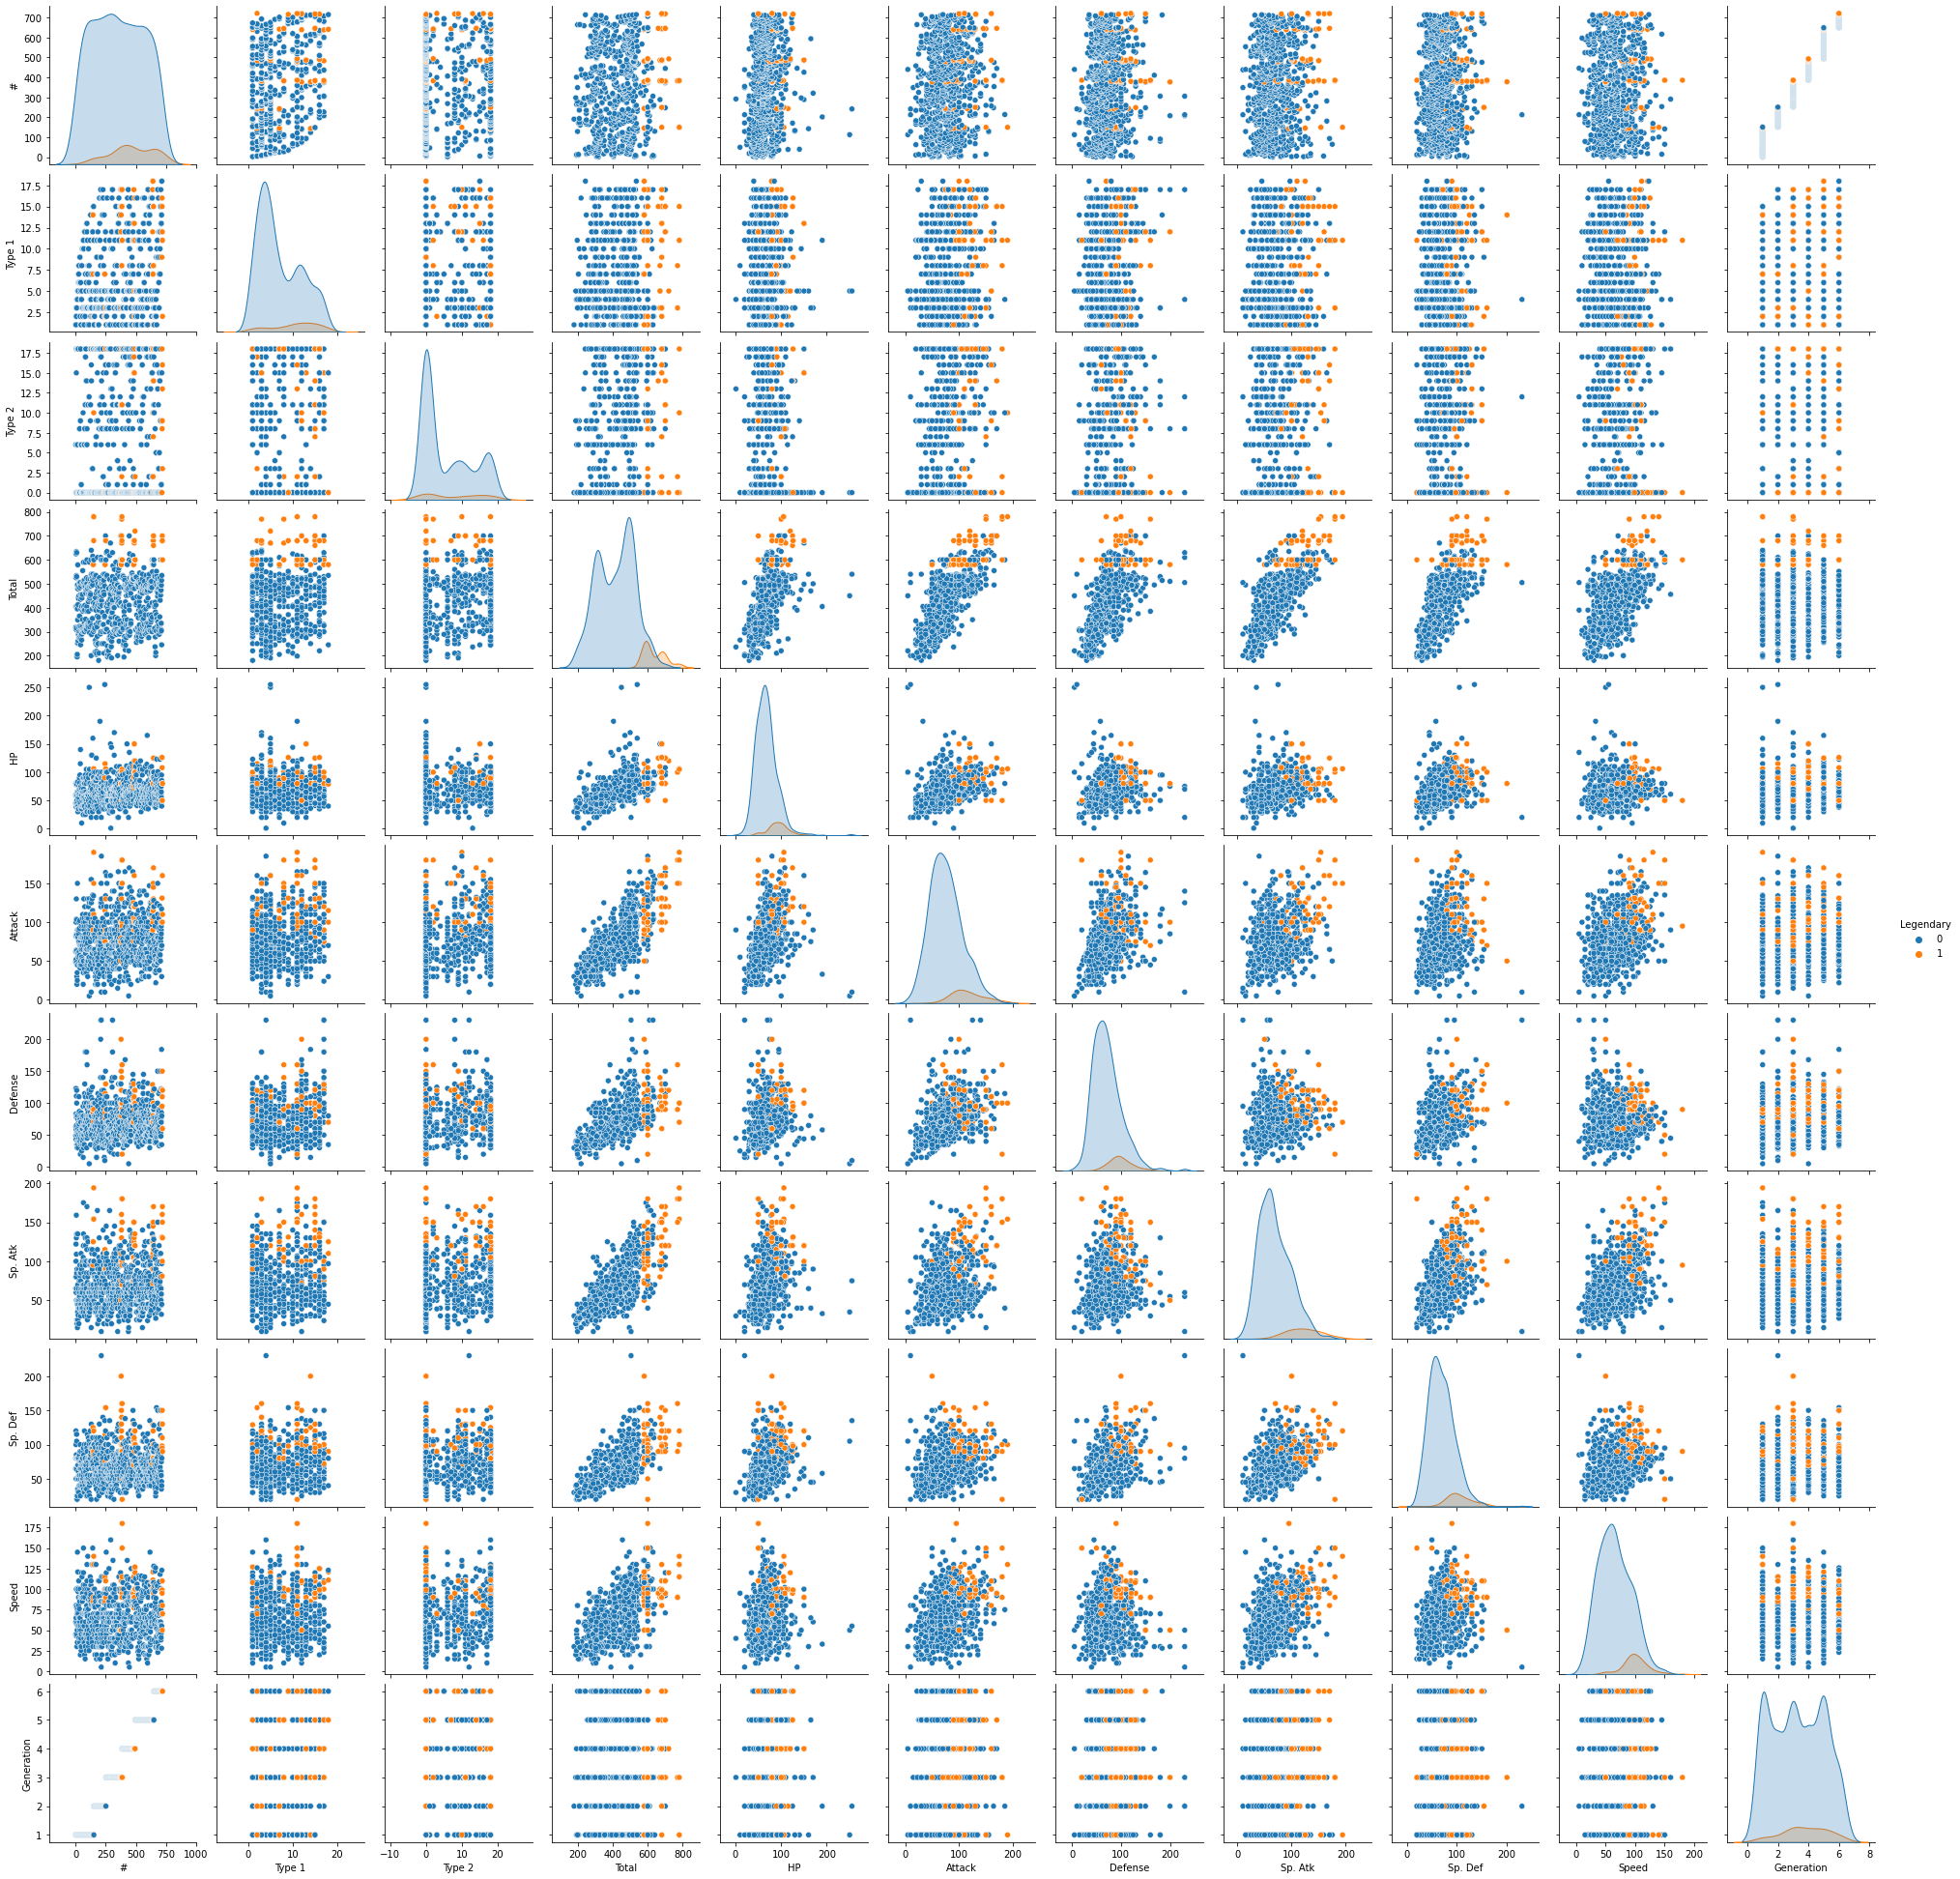

In [26]:
sns.pairplot(DatosPokemonNumericos, hue='Legendary')
plt.show()

In [27]:
# # ! Gráfico de dispersión entre dos variables
# plt.figure(figsize=(14,7))
# sns.scatterplot(x='HP', y='Total', data=DatosPokemonNumericos, hue='Legendary')
# plt.title('Gráfico de dispersión')
# plt.xlabel('HP')
# plt.ylabel('Total')
# plt.show()

In [28]:
# Hacemos de tipo categórico la variable Legendary
DatosPokemonNumericos['Legendary'] = DatosPokemonNumericos['Legendary'].astype('category')

C:\Users\johnc\AppData\Local\Temp/ipykernel_8924/854620099.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
# ! Gráfico de dispersión entre dos variables usando plotly
fig = px.scatter(DatosPokemonNumericos, x='HP', y='Total', color='Legendary', title='Gráfico de dispersión')
fig.show()

In [30]:
CorrPokemons = DatosPokemon.corr(method='pearson')

In [31]:
print(CorrPokemons['Attack'].sort_values(ascending=False)[:10], '\n')   #Top 10 valores más altos

Attack       1.000000
Total        0.736211
Defense      0.438687
HP           0.422386
Sp. Atk      0.396362
Speed        0.381240
Legendary    0.345408
Sp. Def      0.263990
Type 1       0.169334
Type 2       0.166978
Name: Attack, dtype: float64 



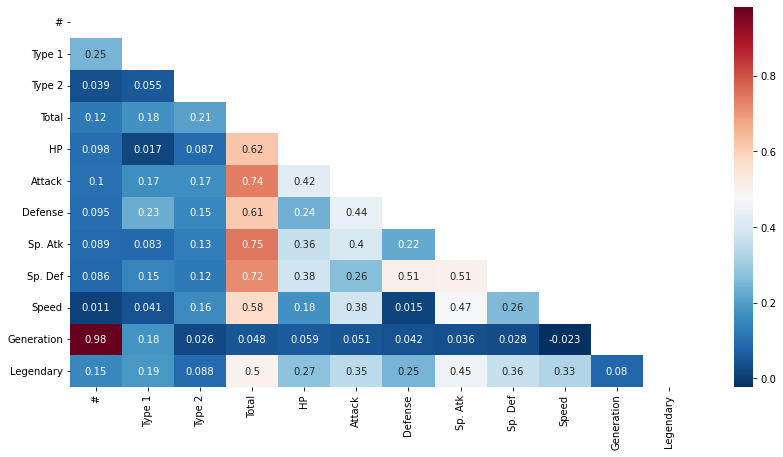

In [32]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrPokemons)
sns.heatmap(CorrPokemons, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

## Selección de variables:
Se tienen 4 correlaciones altas:
- 'Total' y 'Sp. Def' (0.72)
- 'Total' y 'Sp. Atk' (0.75) 
- 'Total' y 'Attack' (0.74)
- '#' y 'Generation' (0.98)

Si el propósito es reducir la dimensionalidad, se pudieran eliminar las variables: 'Total' y '#'.

In [33]:
#Se eliminan las variables seleccionadas para reducir la dimensionalidad
# En este caso, se optó por eliminar la variable #, ya que sería como el ID del pokemon
# Pero se optó por mantener las demás variables para no perder información en un análisis posterior
DatosPokemonACD = DatosPokemon.drop(columns=['#'])
DatosPokemonACD

Name  Type 1  Type 2  Total  HP  Attack  Defense  \
0                Bulbasaur       1       6    318  45      49       49   
1                  Ivysaur       1       6    405  60      62       63   
2                 Venusaur       1       6    525  80      82       83   
3    VenusaurMega Venusaur       1       6    625  80     100      123   
4               Charmander       2       0    309  39      52       43   
..                     ...     ...     ...    ...  ..     ...      ...   
795                Diancie      12       9    600  50     100      150   
796    DiancieMega Diancie      12       9    700  50     160      110   
797    HoopaHoopa Confined      11      13    600  80     110       60   
798     HoopaHoopa Unbound      11      16    680  80     160       60   
799              Volcanion       2       3    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1          0  
1         80       80     60           1          0  
2        100      100     80           1          0  
3        122      120     80           1          0  
4         60       50     65           1          0  
..       ...      ...    ...         ...        ...  
795      100      150     50           6          1  
796      160      110    110           6          1  
797      150      130     70           6          1  
798      170      130     80           6          1  
799      130       90     70           6          1  

[800 rows x 12 columns]

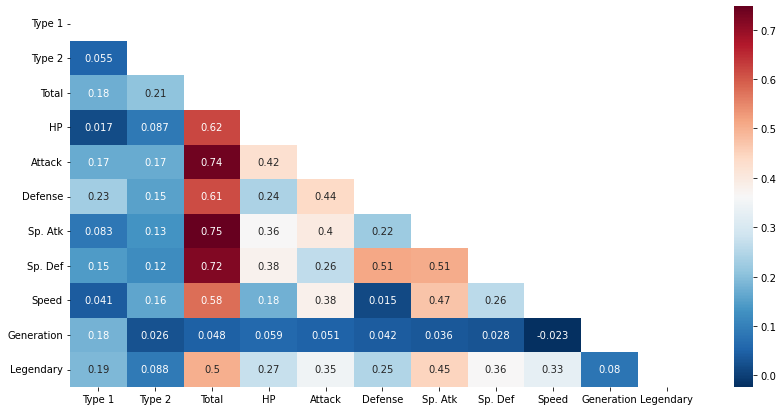

In [34]:
CorrPokemonACD = DatosPokemonACD.corr(method='pearson')
plt.figure(figsize=(14,7))
MatrizInfACD = np.triu(CorrPokemonACD)
sns.heatmap(CorrPokemonACD, cmap='RdBu_r', annot=True, mask=MatrizInfACD)
plt.show()

# MUCHAS GRACIAS POR LEERME 🙏